# Small Area Income and Poverty Estimates (SAIPE): School Districts

This data is a time series, which means that we don't have to
query for a specific year like we do with survey data like the
ACS. Instead, when we download we get multiple years of data at
once.

See https://www.census.gov/data/developers/data-sets/Poverty-Statistics.html.

In [1]:
# So we can run from within the censusdis project and find the packages we need.
import os
import sys

sys.path.append(
    os.path.join(
        os.path.abspath(os.path.join(os.path.curdir, os.path.pardir, os.path.pardir))
    )
)

In [2]:
import censusdis.data as ced

from censusdis.states import STATE_NJ

In [14]:
SD_UNIFIED_EO = "04230"
SD_UNIFIED_EWR = "11340"
SD_UNIFIED_IRV = "07680"
SD_UNIFIED_MC = "10560"
SD_UNIFIED_OC = "12270"
SD_UNIFIED_SOMA = "15330"
SD_UNIFIED_WO = "17610"

SD_UNIFIED_ALL = [
    SD_UNIFIED_EO,
    SD_UNIFIED_EWR,
    SD_UNIFIED_IRV,
    SD_UNIFIED_MC,
    SD_UNIFIED_OC,
    SD_UNIFIED_SOMA,
    SD_UNIFIED_WO,
]

In [15]:
DATASET = "poverty/saipe/schdist"  # "timeseries/poverty/saipe/schdist"

In [16]:
df_variables = ced.variables.all_variables(DATASET, "timeseries", None)

In [17]:
df_variables

,YEAR,DATASET,GROUP,VARIABLE,LABEL,SUGGESTED_WEIGHT,VALUES
0,timeseries,poverty/saipe/schdist,N/A,GEOCAT,"Summary Level (950 Elementary, 960 Secondary, ...",NaN,"{'980': 'Administrative', '970': 'Unified', '9..."
1,timeseries,poverty/saipe/schdist,N/A,GEOID,Combined codes for the reference geography,NaN,None
2,timeseries,poverty/saipe/schdist,N/A,GRADE,Grade Range of District,NaN,None
3,timeseries,poverty/saipe/schdist,N/A,LEAID,School District ID,NaN,None
4,timeseries,poverty/saipe/schdist,N/A,SAEPOV5_17RV_PT,Relevant Age 5 to 17 in Families in Poverty,NaN,{'0': 'Relevant Age 5 to 17 in Families in Pov...
5,timeseries,poverty/saipe/schdist,N/A,SAEPOV5_17V_PT,Relevant Age 5 to 17 Population,NaN,{'0': 'Relevant Age 5 to 17 Population'}
6,timeseries,poverty/saipe/schdist,N/A,SAEPOVALL_PT,Total Population,NaN,{'0': 'Total Population'}
7,timeseries,poverty/saipe/schdist,N/A,SAEPOVRAT5_17RV_PT,Relevant Age 5 to 17 Poverty Ratio Estimate,NaN,None
8,timeseries,poverty/saipe/schdist,N/A,SD_NAME,District Name,NaN,None
9,timeseries,poverty/saipe/schdist,N/A,STATE,State Fips Code,NaN,None


In [18]:
variables = ced.variables.group_leaves(DATASET, "timeseries", None)

variables = [v for v in variables if v != "time"]

variables

['GEOCAT',
 'GEOID',
 'GRADE',
 'LEAID',
 'SAEPOV5_17RV_PT',
 'SAEPOV5_17V_PT',
 'SAEPOVALL_PT',
 'SAEPOVRAT5_17RV_PT',
 'SD_NAME',
 'STATE',
 'YEAR']

In [30]:
df_ts = ced.download(
    DATASET,
    "timeseries",
    variables,
    state=STATE_NJ,
    school_district_unified=SD_UNIFIED_ALL,
)

df_ts  # [df_ts.SD_NAME.str.contains("IRVINGTON")]

,SCHOOL_DISTRICT_UNIFIED,GEOCAT,GEOID,GRADE,LEAID,SAEPOV5_17RV_PT,SAEPOV5_17V_PT,SAEPOVALL_PT,SAEPOVRAT5_17RV_PT,SD_NAME,STATE,STATE,YEAR
0,04230,970,3404230,KG-12,04230,3898,13546,71239,28.8,EAST ORANGE,34,34,1995
1,07680,970,3407680,KG-12,07680,2401,11682,59099,20.6,IRVINGTON TOWNSHIP,34,34,1995
2,10560,970,3410560,PK-12,10560,409,5626,36542,7.3,MONTCLAIR TOWN,34,34,1995
3,11340,970,3411340,PK-12,11340,24448,57748,266565,42.3,NEWARK CITY,34,34,1995
4,12270,970,3412270,KG-12,12270,1599,5168,28984,30.9,CITY OF ORANGE TWP,34,34,1995
...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,10560,970,3410560,KG-12,10560,380,7498,40504,5.1,Montclair Town School District,34,34,2021
171,11340,970,3411340,KG-12,11340,15814,54847,308371,28.8,Newark City School District,34,34,2021
172,12270,970,3412270,KG-12,12270,1347,5884,34096,22.9,Orange City Township School District,34,34,2021
173,15330,970,3415330,KG-12,15330,331,8000,43717,4.1,South Orange-Maplewood School District,34,34,2021


In [20]:
df_ts["School District"] = df_ts["SCHOOL_DISTRICT_UNIFIED"].map(
    {
        district: df_district[df_district["YEAR"] == max(df_district["YEAR"])][
            "SD_NAME"
        ].iloc[0]
        for district, df_district in df_ts.groupby("SCHOOL_DISTRICT_UNIFIED")
    },
)


# for district, df_district in df_ts.groupby('SCHOOL_DISTRICT_UNIFIED'):
#    print(df_district[df_district['YEAR'] == max(df_district['YEAR'])]['SD_NAME'].iloc[0])

In [21]:
df_ts

,SCHOOL_DISTRICT_UNIFIED,GEOCAT,GEOID,GRADE,LEAID,SAEPOV5_17RV_PT,SAEPOV5_17V_PT,SAEPOVALL_PT,SAEPOVRAT5_17RV_PT,SD_NAME,STATE,STATE,YEAR,School District
0,04230,970,3404230,KG-12,04230,3898,13546,71239,28.8,EAST ORANGE,34,34,1995,East Orange City School District
1,07680,970,3407680,KG-12,07680,2401,11682,59099,20.6,IRVINGTON TOWNSHIP,34,34,1995,Irvington Township School District
2,10560,970,3410560,PK-12,10560,409,5626,36542,7.3,MONTCLAIR TOWN,34,34,1995,Montclair Town School District
3,11340,970,3411340,PK-12,11340,24448,57748,266565,42.3,NEWARK CITY,34,34,1995,Newark City School District
4,12270,970,3412270,KG-12,12270,1599,5168,28984,30.9,CITY OF ORANGE TWP,34,34,1995,Orange City Township School District
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,10560,970,3410560,KG-12,10560,380,7498,40504,5.1,Montclair Town School District,34,34,2021,Montclair Town School District
171,11340,970,3411340,KG-12,11340,15814,54847,308371,28.8,Newark City School District,34,34,2021,Newark City School District
172,12270,970,3412270,KG-12,12270,1347,5884,34096,22.9,Orange City Township School District,34,34,2021,Orange City Township School District
173,15330,970,3415330,KG-12,15330,331,8000,43717,4.1,South Orange-Maplewood School District,34,34,2021,South Orange-Maplewood School District


Text(0.5, 1.0, 'Relevant Age 5 to 17 Poverty Ratio Estimate')

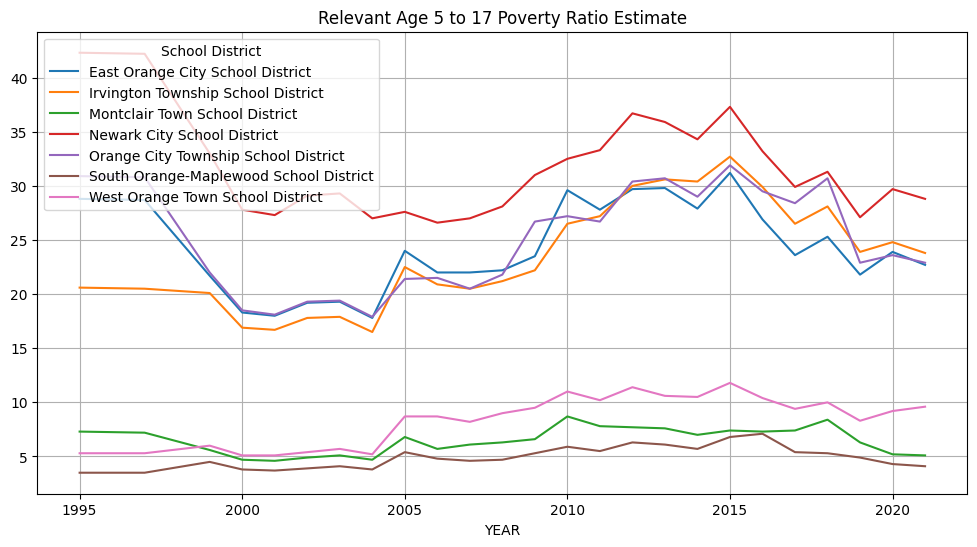

In [28]:
ax = df_ts.pivot(
    index="YEAR", columns="School District", values="SAEPOVRAT5_17RV_PT"
).plot(figsize=(12, 6))

ax.grid(True)

ax.set_title(
    df_variables[df_variables.VARIABLE == "SAEPOVRAT5_17RV_PT"]["LABEL"].iloc[0]
)

'Relevant Age 5 to 17 Poverty Ratio Estimate'